In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')
df.sample(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
52,62,M,LOW,NORMAL,27.183,drugY
74,31,M,HIGH,NORMAL,17.069,drugY
189,64,M,HIGH,NORMAL,20.932,drugY
69,18,F,HIGH,NORMAL,24.276,drugY
167,57,F,NORMAL,HIGH,14.216,drugX
132,49,M,LOW,NORMAL,13.598,drugX


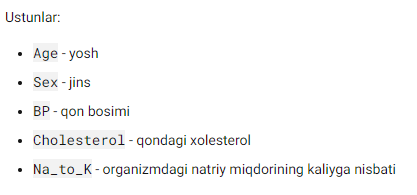

In [22]:
enc = LabelEncoder()
df['Sex'] = enc.fit_transform(df['Sex'].values)
df['BP'] = enc.fit_transform(df['BP'])
df['Cholesterol'] = enc.fit_transform(df['Cholesterol'])
df.sample(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
29,45,1,1,0,17.951,drugY
47,68,1,1,0,10.291,drugC
164,16,1,0,1,19.007,drugY
110,50,1,0,0,7.490,drugA
41,58,0,0,1,14.239,drugB
117,40,0,2,0,10.103,drugX


In [23]:
df.shape

(200, 6)

In [24]:
x = df[df.drop('Drug', axis=1).columns].values
x[:4]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798]])

In [25]:
y = df['Drug'].values
y[:7]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY'],
      dtype=object)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Model

In [27]:
tree_model = DecisionTreeClassifier()

tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

**Natija**

In [28]:
y_predict = tree_model.predict(x_test)

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [30]:
print(accuracy_score(y_test, y_predict))

1.0


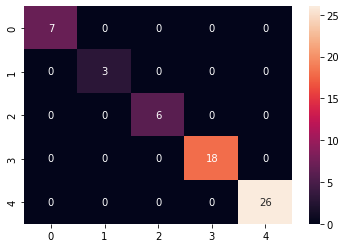

In [31]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Decision tree**

In [32]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


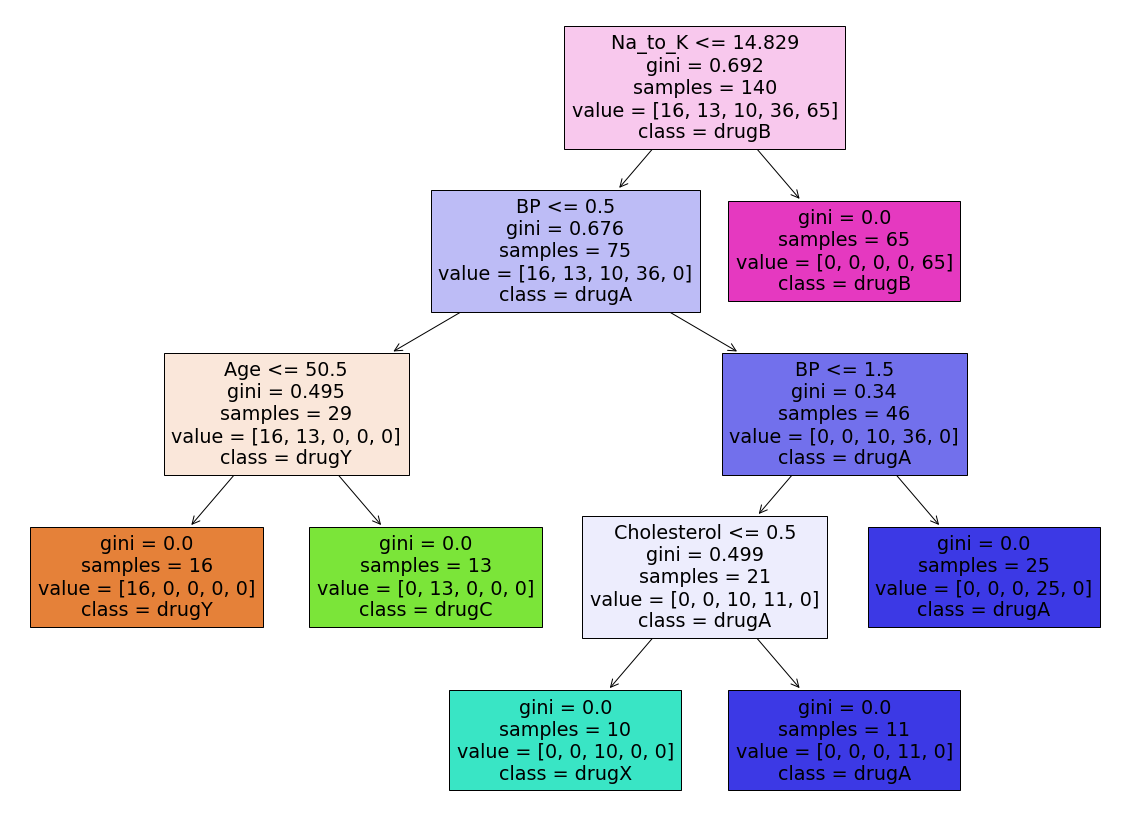

In [33]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(20, 15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Xatolik : 0.9


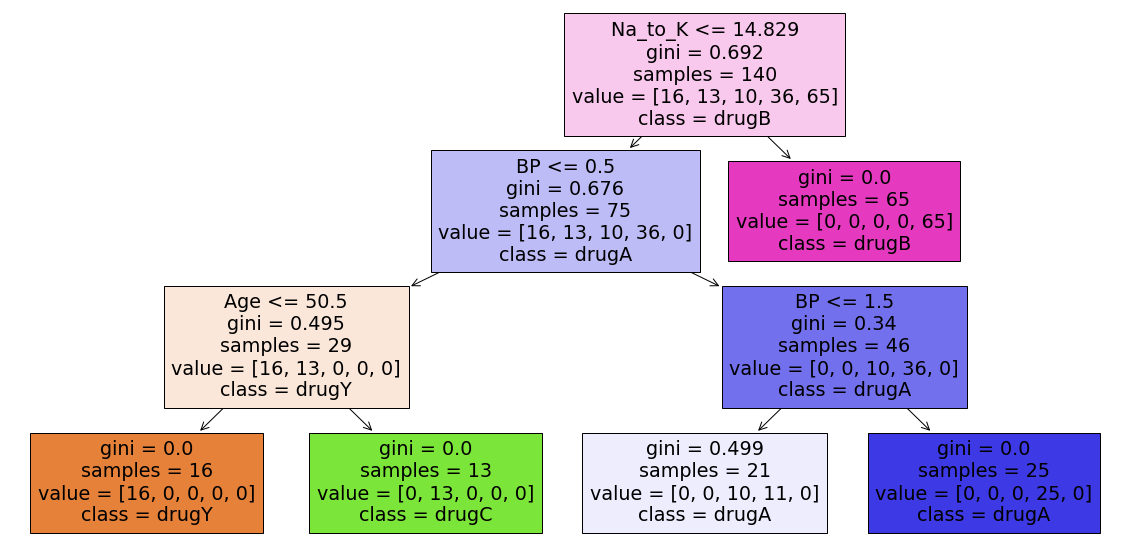

In [34]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print(f"Xatolik : {accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Xatolik : 0.9


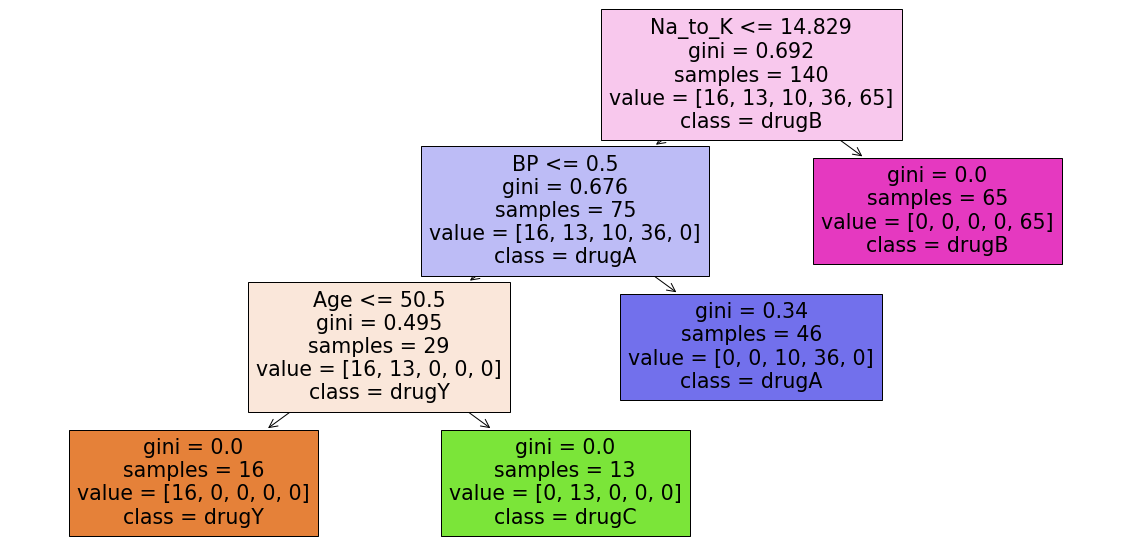

In [35]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.04, max_depth=3)

tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print(f"Xatolik : {accuracy_score(y_test, y_predict)}")

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**Random Forest**

In [39]:
rf_model = RandomForestClassifier(n_estimators=20) #n_estimators=20 daraxtlar soni

rf_model.fit(x_train, y_train)

y_predict = rf_model.predict(x_test)

print(f"Xatolik: {accuracy_score(y_test, y_predict)}")

print(classification_report(y_test, y_predict))

Xatolik: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

